# <center><font face='CM Roman'>STAT 5291 Advanced Data Analysis Problem Set 1</font></center>
<center><font face='CM Roman'>Francis Zhang xz3279</font></center>
<center><font face='CM Roman'>9/13/2024</font></center>


**i)Determine whether there are outliers in the combined data,  using boxplots or other suitable methods.**

In [28]:
install.packages("bootstrap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("Sleuth3", repos="http://R-Forge.R-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(Sleuth3)
summary(case0102)

     Salary         Sex    
 Min.   :3900   Female:61  
 1st Qu.:4980   Male  :32  
 Median :5400              
 Mean   :5420              
 3rd Qu.:6000              
 Max.   :8100              

In [4]:
stem(case0102$Salary)


  The decimal point is 3 digit(s) to the right of the |

  3 | 9
  4 | 03444444
  4 | 55668888888888
  5 | 0011111111222233344444444444444444
  5 | 5566777777
  6 | 0000000000000001333
  6 | 666899
  7 | 
  7 | 
  8 | 1



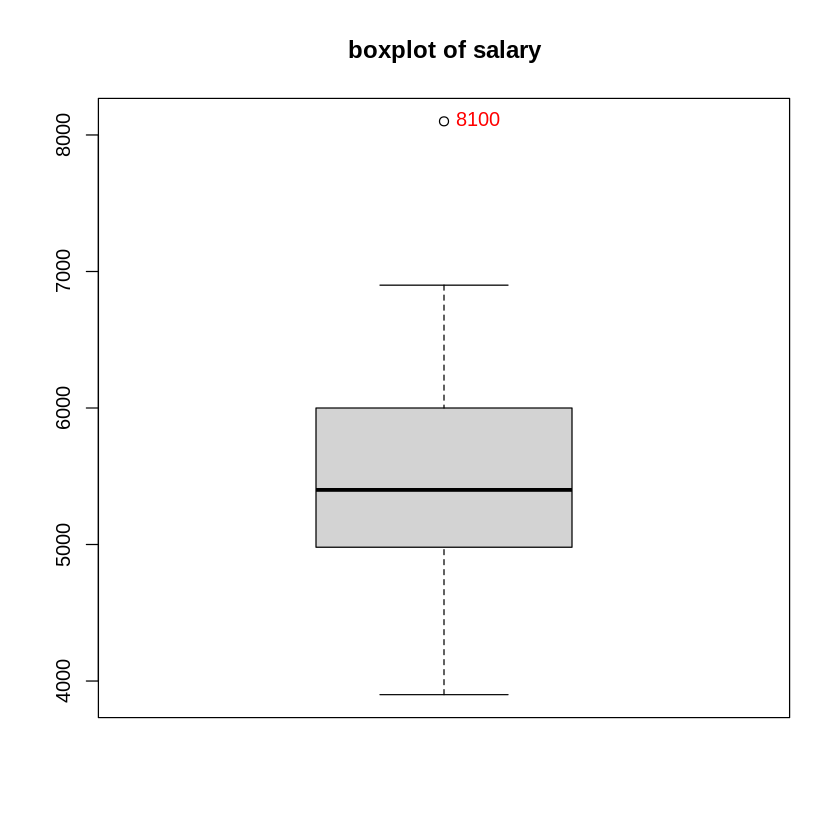

In [6]:
 box <- boxplot(case0102$Salary, main = "boxplot of salary")
 outliers <- box$out
 text(rep(1, length(outliers)), outliers, labels = outliers, pos = 4, col = "red")

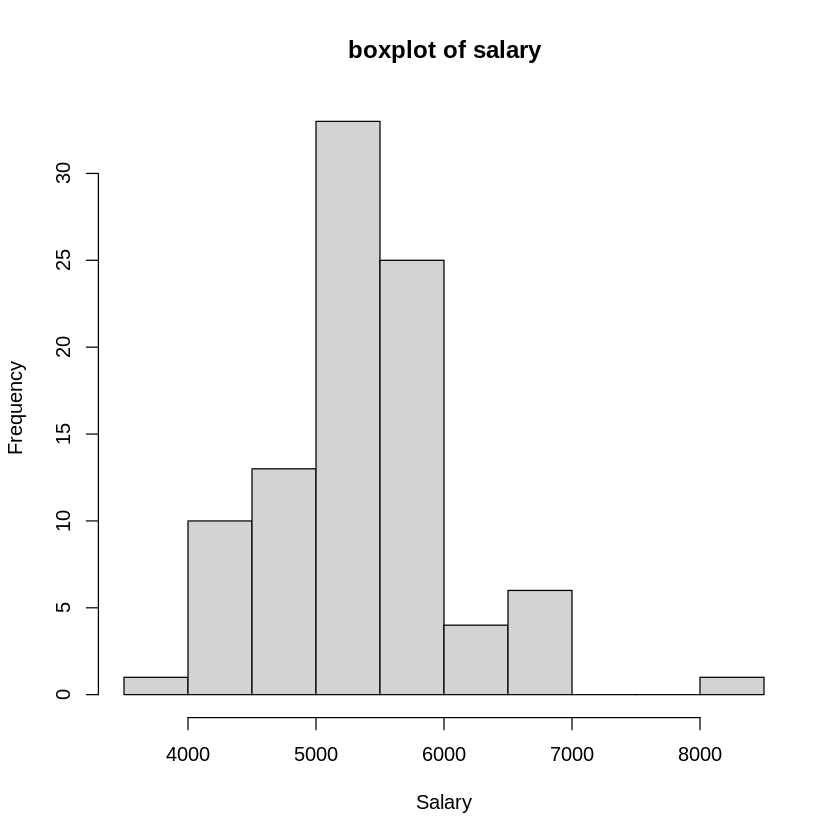

In [7]:
hist(case0102$Salary, main = "boxplot of salary", breaks = 10, xlab = "Salary")

In [8]:
case0102[which.max(case0102$Salary),]

,Salary,Sex
,<int>,<fct>
93,8100,Male


In [9]:
IQR(case0102$Salary)

[1] 1020

<font face='CM Roman'>From above plots, we find that there is one outlier with salary of 8100 and sex as male. It can be proved
since the IQR is 1020 and third quantile is 6000, 1.5*1020 + 6000 = 7530 < 8100 which means the point is
not in the range.</font>



**ii)Perform separate EDA, and compute the sample coefficient of variation and median for Salary in each group (i.e., Males and Females).**

In [10]:
#make sure if there is no missing data
sum(is.na(case0102))

[1] 0

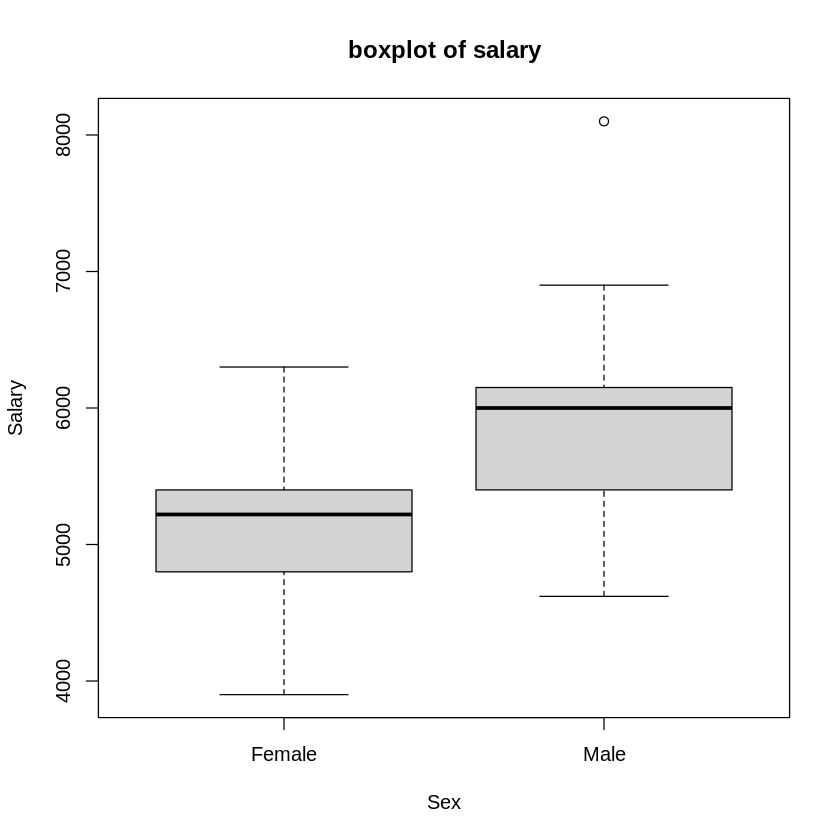

In [11]:
female <- case0102[case0102$Sex == "Female",]
male <- case0102[case0102$Sex == "Male",]
boxplot(Salary~Sex, data = case0102, main = "boxplot of salary")

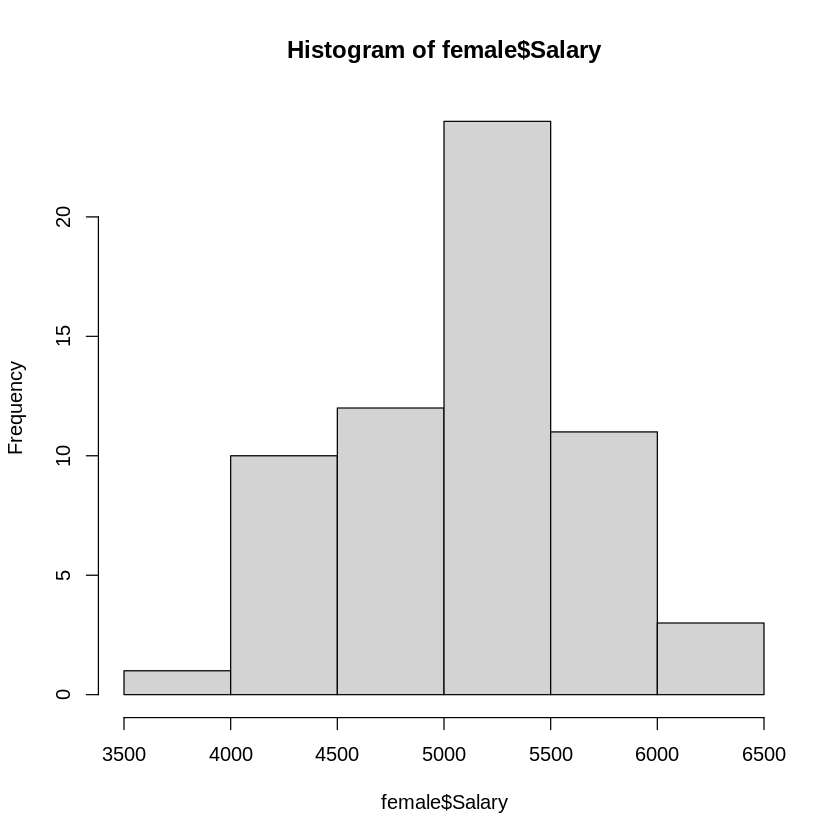

In [12]:
hist(female$Salary)

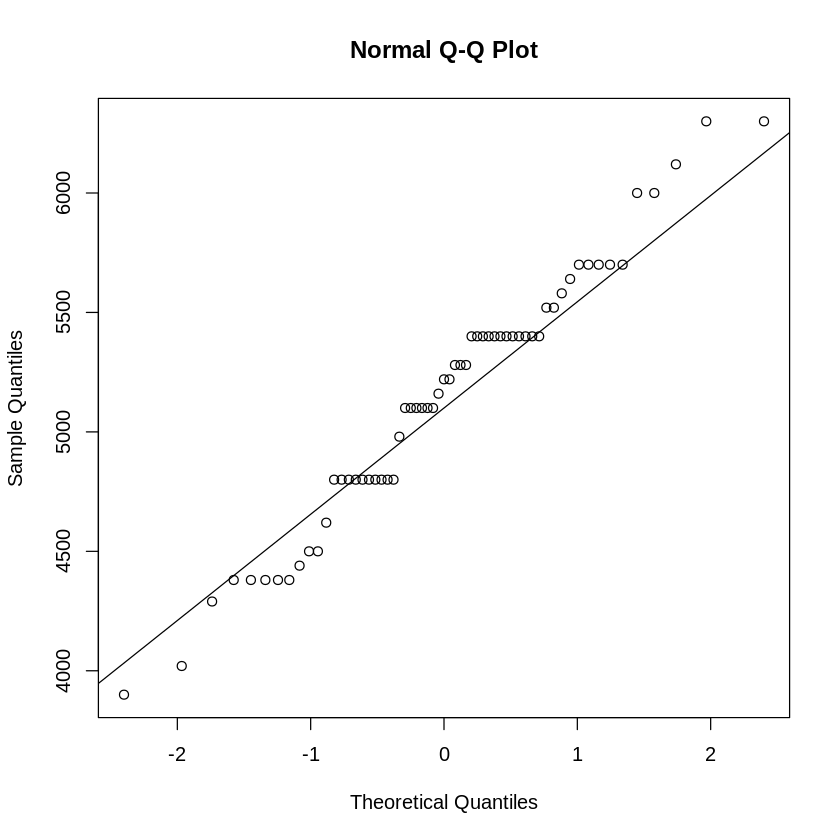

In [15]:
qqnorm(female$Salary)
qqline(female$Salary)

In [16]:
stem(female$Salary)


  The decimal point is 2 digit(s) to the right of the |

  38 | 0
  40 | 2
  42 | 988888
  44 | 400
  46 | 2
  48 | 00000000008
  50 | 0000006
  52 | 22888
  54 | 000000000000228
  56 | 400000
  58 | 
  60 | 002
  62 | 00



In [17]:
summary(female)

     Salary         Sex    
 Min.   :3900   Female:61  
 1st Qu.:4800   Male  : 0  
 Median :5220              
 Mean   :5139              
 3rd Qu.:5400              
 Max.   :6300              

In [19]:
cv_female <- sd(female$Salary) / mean(female$Salary)

In [20]:
cv_female

[1] 0.1050567

<font face='CM Roman'>The sample coefficient of variation for Salary is 0.10506 and median for Salary is 5220 in female group.</font>

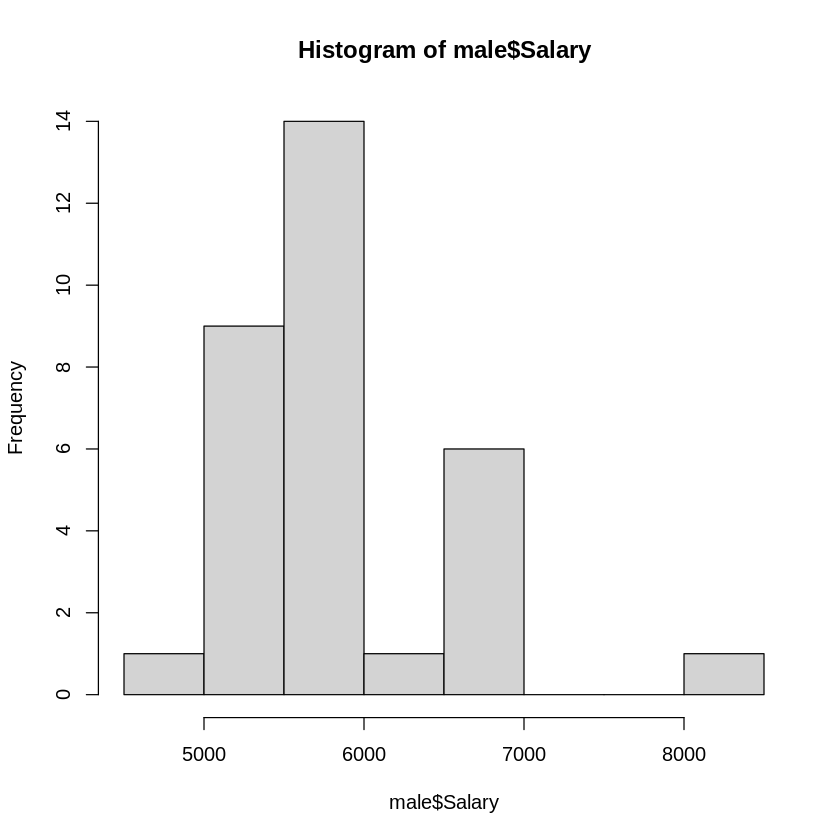

In [21]:
hist(male$Salary)

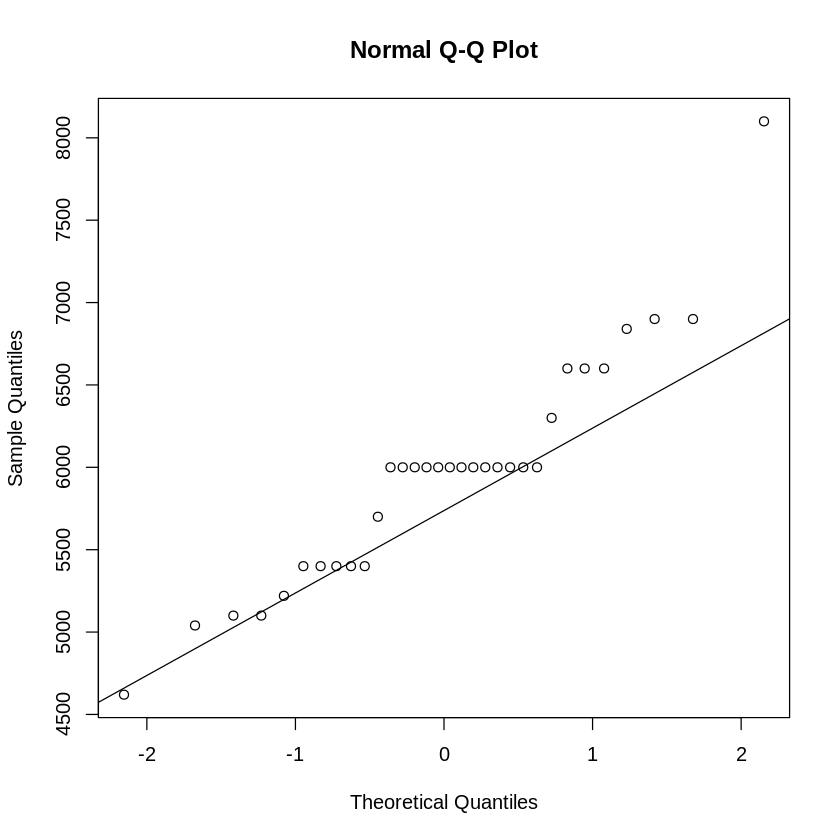

In [22]:
qqnorm(male$Salary)
qqline(male$Salary)

In [23]:
stem(male$Salary)


  The decimal point is 3 digit(s) to the right of the |

  4 | 6
  5 | 011244444
  5 | 7
  6 | 00000000000003
  6 | 666899
  7 | 
  7 | 
  8 | 1



In [24]:
summary(male)

     Salary         Sex    
 Min.   :4620   Female: 0  
 1st Qu.:5400   Male  :32  
 Median :6000              
 Mean   :5957              
 3rd Qu.:6075              
 Max.   :8100              

In [25]:
cv_male <- sd(male$Salary) / mean(male$Salary)

In [26]:
cv_male

[1] 0.1159556

<font face='CM Roman'>The sample coefficient of variation for Salary is 0.1160 and median for Salary is 6000 in female group.</font>

**iii)For each of the estimates computed in (ii) above, determine the bias and variance using each of the following methods: Jackknife, Bootstrap.**

**Jackknife for male group**

In [29]:
library(bootstrap)
jackknife(male$Salary,sd)$jack.bias

[1] -11.28011

In [30]:
jackknife(male$Salary,sd)$jack.se^2

[1] 15578.99

<font face='CM Roman'>The bias of SD under the jackknife method is -11.28011. The variance of estimator is 15578.99.</font>

In [31]:
jackknife(male$Salary,IQR)$jack.bias

[1] 1162.5

In [32]:
jackknife(male$Salary,IQR)$jack.se^2

[1] 130781.2

<font face='CM Roman'>The bias of IQR under the jackknife method is 1162.5. The variance of estimator is 130781.2.</font>

**Jackknife for female group**

In [33]:
jackknife(female$Salary,sd)$jack.bias

[1] -1.946738

In [34]:
jackknife(female$Salary,sd)$jack.se^2

[1] 2101.91

<font face='CM Roman'>The bias of SD under the jackknife method is -1.946738. The variance of estimator is 2101.91.</font>

In [35]:
jackknife(female$Salary,IQR)$jack.bias

[1] 0

In [36]:
jackknife(female$Salary,IQR)$jack.se^2

[1] 0

<font face='CM Roman'>The bias of IQR under the jackknife method and the variance of estimator is zero.</font>

**Bootstrap for male group**

In [40]:
set.seed(0)
B <- 1000
n <- length(male$Salary)
est <- vector(length = B)
for (i in 1:B) {
sample.new <- sample(male$Salary, n, replace = T)
est[i] <- sd(sample.new)
}
b.sd.bias <- mean(est) - sd(male$Salary)
b.sd.bias

[1] -20.83455

In [41]:
b.sd.var <- var(est)
b.sd.var

[1] 11643.32

<font face='CM Roman'>The bias of SD under the bootstrap method is -20.8346. The variance of estimator is 11643.32.</font>

In [42]:
set.seed(0)
B <- 1000
n <- length(male$Salary)
est <- vector(length = B)
for (i in 1:B) {
  sample.new <- sample(male$Salary, n, replace = T)
  est[i] <- IQR(sample.new)
}
b.IQR.bias <- mean(est) - IQR(male$Salary)
b.IQR.bias

[1] 37.155

In [43]:
b.IQR.var <- var(est)
b.IQR.var

[1] 81888.17

<font face='CM Roman'>The bias of IQR under the bootstrap method is 37.155. The variance of estimator is (SE)ˆ2 = 81888.17.</font>

**Bootstrap for female group**

In [44]:
set.seed(0)
B <- 1000
n <- length(female$Salary)
est <- vector(length = B)
for (i in 1:B) {
sample.new <- sample(female$Salary, n, replace = T)
est[i] <- sd(sample.new)
}
b.sd.bias <- mean(est) - sd(female$Salary)
b.sd.bias

[1] -5.36415

In [45]:
b.sd.var <- var(est)
b.sd.var

[1] 2018.277

<font face='CM Roman'>The bias of SD under the bootstrap method is -5.3642. The variance of estimator is 2018.28.</font>

In [46]:
B <- 1000
n <- length(female$Salary)
est <- vector(length = B)
for (i in 1:B) {
sample.new <- sample(female$Salary, n, replace = T)
est[i] <- IQR(sample.new)
}
b.IQR.bias <- mean(est) - IQR(female$Salary)
b.IQR.bias

[1] 69.42

In [47]:
b.IQR.var <- var(est)
b.IQR.var

[1] 13457.12

<font face='CM Roman'>The bias of IQR under the bootstrap method is 69.42. The variance of estimator is 13457.12..</font>